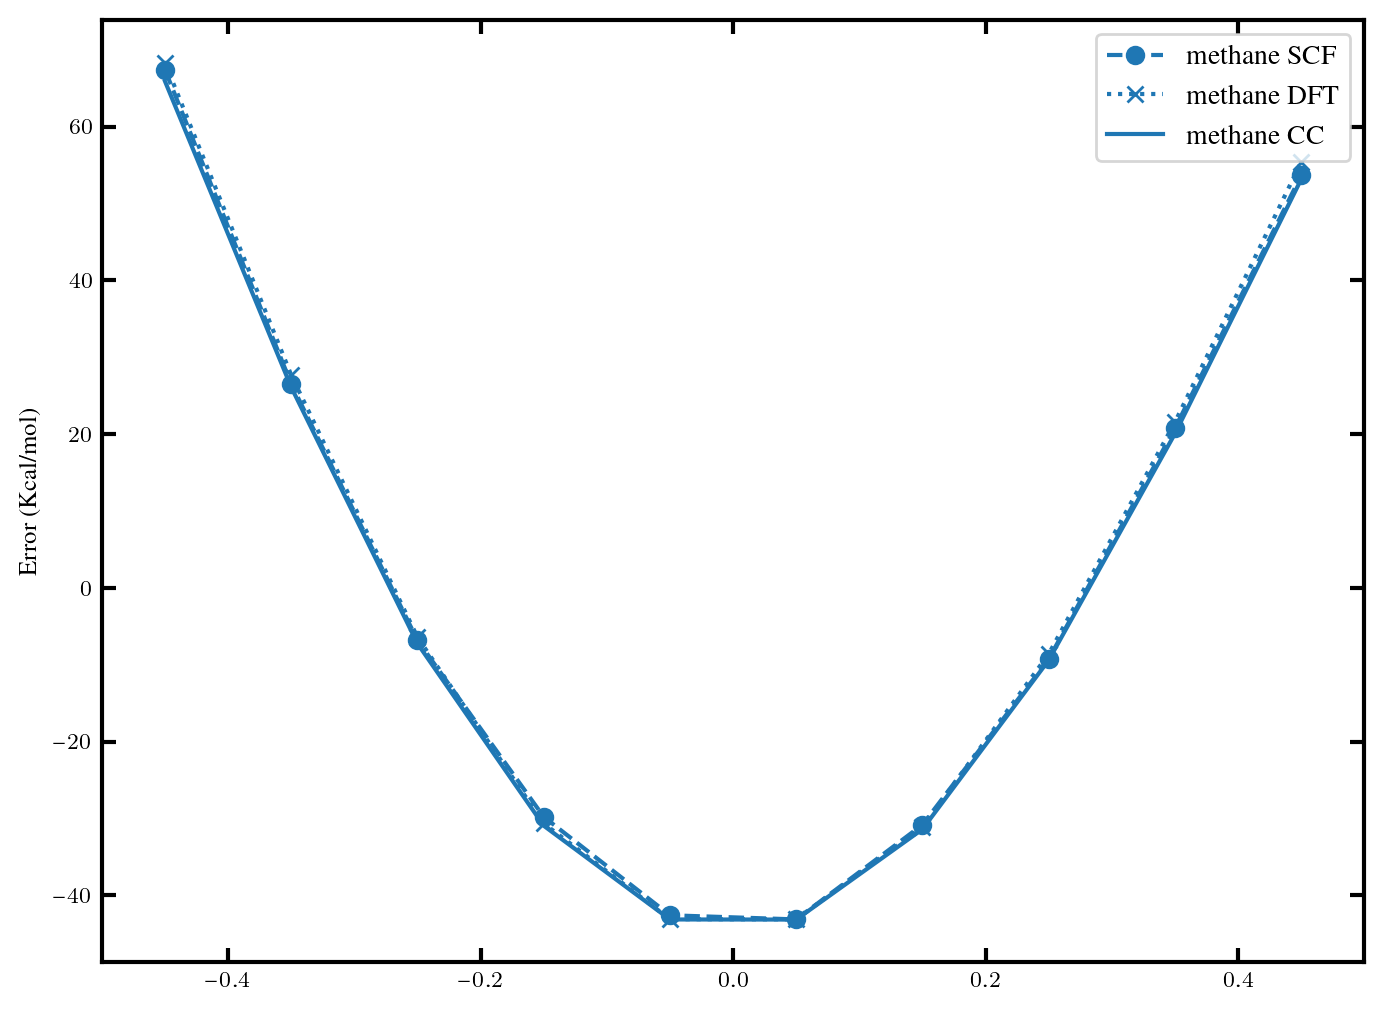

<Figure size 686.111x541.667 with 0 Axes>

In [36]:
from pathlib import Path
import datetime

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("retina")

TRAIN_STR_DICT = [
    "methane",
    # "ethane",
    # "ethylene",
    # "acetylene",
]
EVAL_STR_DICT = [
    # "propane",
    # "propyne",
    # "propylene",
    # "allene",
    # "cyclopropene",
    # "cyclopropane",
    # "butane",
    # "butyne",
    # "isobutane",
    # "butadiene",
    # "pentane",
    # "cyclopentane",
    # "isopentane",
    # "benzene",
]
from matplotlib import rcParams
from matplotlib import rc


rc("font", **{"family": "sans-serif", "sans-serif": ["Helvetica"]})
rc("text", usetex=True)
rc("font", family="serif")

rcParams["text.latex.preamble"] = thesis_latex

fontsize = 10.045
sca_size = 2
plt.rc("font", size=fontsize)  # controls default text size
plt.rc("axes", titlesize=fontsize)  # fontsize of the title
plt.rc("axes", labelsize=fontsize - 1)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=fontsize - 2)  # fontsize of the x tick labels
plt.rc("ytick", labelsize=fontsize - 2)  # fontsize of the y tick labels
plt.rc("legend", fontsize=fontsize)  # fontsize of the legend

rcParams["axes.linewidth"] = 1.5
rcParams["lines.linewidth"] = 1.5
rcParams["xtick.major.width"] = 3
rcParams["xtick.minor.size"] = 5
rcParams["xtick.major.size"] = 5
rcParams["ytick.minor.size"] = 5
rcParams["ytick.major.size"] = 5
rcParams["xtick.minor.width"] = 1.5
rcParams["xtick.major.width"] = 1.5
rcParams["ytick.minor.width"] = 1.5
rcParams["ytick.major.width"] = 1.5

plt.rcParams["figure.figsize"] = np.array([0.95, 0.75]) * 520 / 72

model_number = "ccdft_2024-07-13-18-43-51_64_4_0"

f, axes = plt.subplots(1, 1)
if axes is not np.ndarray:
    axes = np.array([[axes]])
elif len(axes.shape) == 1:
    axes = axes.reshape(1, -1)

begin_y = 0.125
end_y = 0.995
int_y = 0.00125
begin_x = 0.075
end_x = 0.995
int_x = 0.00125
end_x += int_x
end_y += int_y

shapexy = np.shape(axes)
inter_x = np.linspace(begin_x, end_x, shapexy[1] + 1)
inter_y = np.linspace(begin_y, end_y, shapexy[0] + 1)

delta_x = inter_x[1] - inter_x[0] - int_x
delta_y = inter_y[1] - inter_y[0] - int_y

for i in range(shapexy[0]):
    for j in range(shapexy[1]):
        axes[i][j].set_position(
            [
                inter_x[j],
                inter_y[i],
                inter_x[j + 1] - inter_x[j] - int_x,
                inter_y[i + 1] - inter_y[i] - int_y,
            ]
        )
        axes[i][j].xaxis.set_tick_params(
            direction="in", which="both", bottom=True, top=True
        )
        axes[i][j].yaxis.set_tick_params(
            direction="in", which="both", left=True, right=True
        )

axes = axes[::-1, :]

load_name = f"../validate/{model_number}"
load_path = Path(f"{load_name}")

data = pd.read_csv(load_path)
data_dft = pd.read_csv(f"../validate/tz_dft")
# data_dft = pd.read_csv(f"../validate/dz_dft")

data_cc = pd.read_csv(f"../validate/tz_cc")
# data_cc = pd.read_csv(f"../validate/dz_dft")

number_draw = 0

for dict_ in [TRAIN_STR_DICT, EVAL_STR_DICT]:
    for i_name in dict_:
        data_tmp = data.loc[data["name"].str.match(i_name)]
        data_eq1 = data_dft.loc[data_dft["name"].str.match(i_name)]
        data_cc_tmp = data_cc.loc[data_cc["name"].str.match(i_name)]
        data_eq = data_eq1.loc[data_eq1["name"].str.contains(f"0_1_0.0000")]

        data_abs_cc_ene = data_cc_tmp["abs_cc_ene_l"]
        data_abs_cc_ene = data_abs_cc_ene - np.mean(data_abs_cc_ene)
        data_loss_scf_ene = np.abs(data_tmp["error_scf_ene"])
        data_loss_dft_ene = data_tmp["error_dft_ene"]
        data_loss_dft_ene = data_loss_dft_ene - np.mean(data_eq["error_dft_ene"])
        data_loss_dft_ene = np.abs(data_loss_dft_ene)

        name_list = data_tmp["name"].values
        for i in range(len(name_list)):
            name_list[i] = float(name_list[i].split("_")[-1])
        lines = axes[0, 0].plot(
            name_list,
            data_abs_cc_ene + data_loss_scf_ene,
            "--o",
            label=(i_name + " SCF"),
        )
        linecolor = lines[0].get_color()
        axes[0, 0].plot(
            name_list,
            data_abs_cc_ene + data_loss_dft_ene,
            ":x",
            label=(i_name + " DFT"),
            color=linecolor,
        )
        axes[0, 0].plot(
            name_list,
            data_abs_cc_ene,
            label=(i_name+" CC"),
            color=linecolor,
        )

for i_row in range(axes.shape[0]):
    for i_col in range(axes.shape[1]):
        # axes[i_row, i_col].set_xticks([])
        # axes[i_row, -1].set_yticks([])
        # axes[-1, i_col].set_xticks([])
        axes[i_row, i_col].set_xlim(-0.5, 0.5)

axes[0, 0].set_ylabel("Error (Kcal/mol)")
axes[0, 0].legend()
# for i_col in range(1):
#     axes[0, i_col].set_ylim(-8, 88)

plt.savefig(f"../manu/figures/{model_number}-surface.pdf")
plt.show()
plt.clf()

In [32]:
print(np.linspace(-1.35, -0.45, 10))
print(np.linspace(-0.45, 0.45, 10))

[-1.35 -1.25 -1.15 -1.05 -0.95 -0.85 -0.75 -0.65 -0.55 -0.45]
[-0.45 -0.35 -0.25 -0.15 -0.05  0.05  0.15  0.25  0.35  0.45]


In [30]:
print(f"{111.3774:0.2g}")

1.1e+02


In [5]:
data_tmp = data.loc[data["name"].str.match("pentane")]
data_eq = data_tmp.loc[data_tmp["name"].str.contains(f"0_1_0.0000")]

data_loss_scf_ene = np.abs(data_tmp["error_scf_ene"])
data_loss_dft_ene = data_tmp["error_dft_ene"] - np.mean(
    data_tmp["error_dft_ene"]
)
data_loss_dft_ene = np.abs(data_loss_dft_ene)

In [3]:
data_loss_scf_ene

50     4.681044
51    10.297631
52    15.150055
53    17.307086
54    17.074415
55    17.073513
56    17.304690
57    15.150457
58    10.292622
59     4.694251
Name: error_scf_ene, dtype: float64